# Calculate HITS score:

In [1]:
%%bash
./HITSExperimentOverlappingIntervals.scala

Loading nodes...
Loading edges...
Selecting subgraph Kraj Vysocina
Number of vertices: 152810
Number of edges: 37086
Running HITS algorithm...
HITS finished in 406.79 seconds.


# Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.font_manager as font_manager
import datetime as dt
sns.set_style("darkgrid")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def prettify_plot(plot_func):
    ax = plt.subplot(111)
    plot_func(ax)
    ax.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0., fontsize=18)
    _ = ax.set_title("Creditor authorities", fontsize=20)

In [4]:
results_raw = [json.loads(line) for line in open("./data/hits_overlapping_intervals.jsonline")]
rows = []
for item in results_raw:
    row = {"id": item["id"], "type": item["type"]}
    for score in item["scores"]:
        date_id = int(score["date"])
        date = dt.date(date_id // 100, date_id % 100, 1)
        row[date] = score["authority"]
    rows += [row]

In [5]:
authorities_df = pd.DataFrame(rows).set_index("id")

# Creditors

In [6]:
top_creditors = [u"gemoneybank", u"providentfinancial", u"českáspořitelna", u"proficreditczech", u"všeobecnázdravotnípojišťovnačeskérepubliky", u"ab4bv", 
                 u"o2czechrepublic", u"cetelemčr", u"essox", u"t-mobileczechrepublic", u"čezprodej", u"ab5bv", u"homecredit", u"bohemiafaktoring", 
                 u"československáobchodníbanka", u"komerčníbanka", u"jetmoney", u"kooperativapojišťovnaasviennainsurancegroup", u"smartcapital", u"monetamoneybank"]

In [7]:
creditor_authorities_df = authorities_df[authorities_df["type"] == "creditor"].copy().drop("type", axis=1).T.sort_index().T

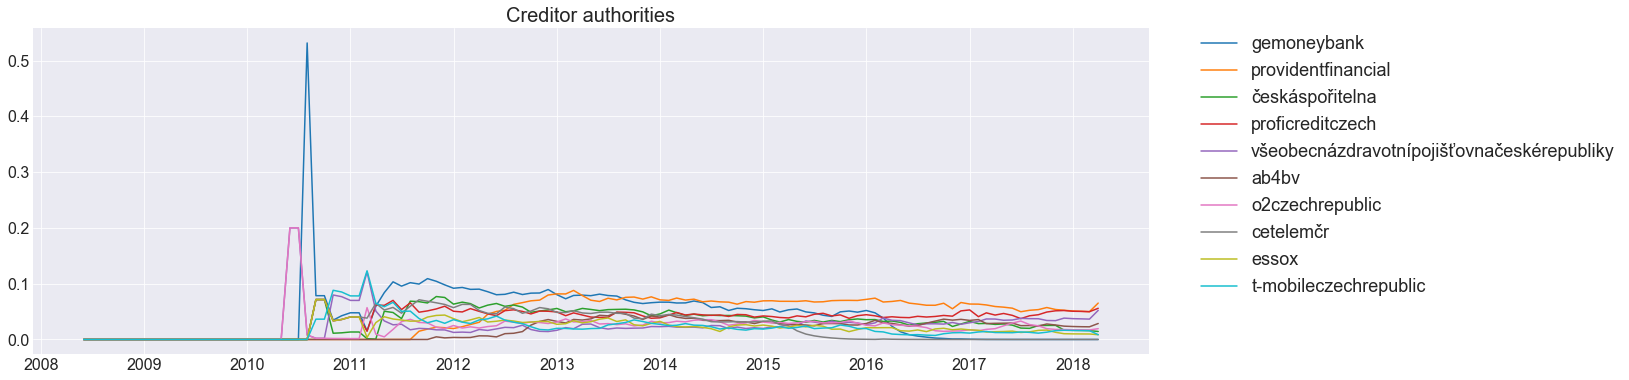

In [8]:
prettify_plot(lambda ax: creditor_authorities_df.loc[top_creditors[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6), fontsize=16))

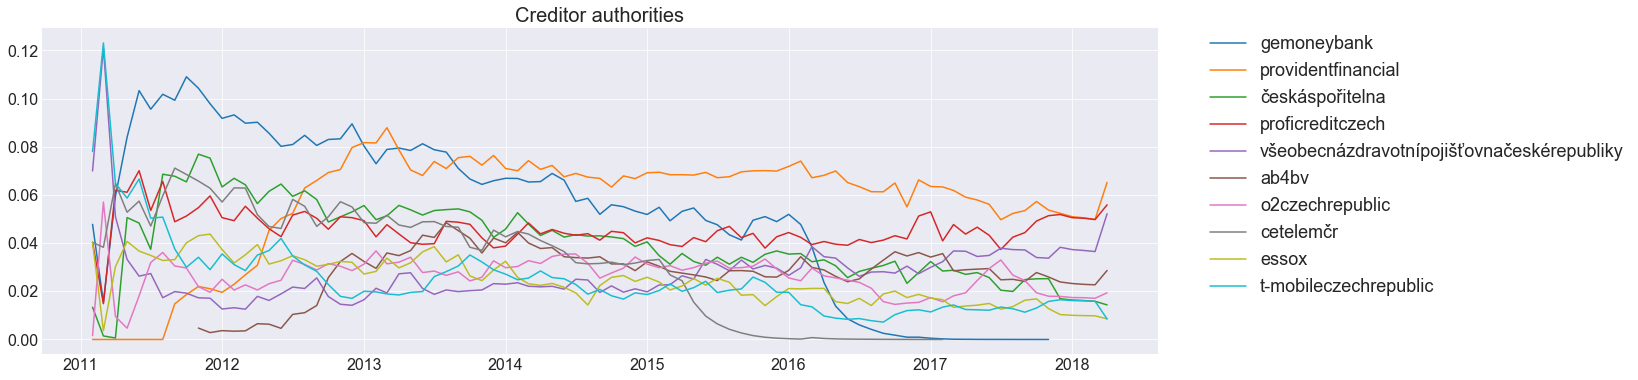

In [9]:
prettify_plot(lambda ax: creditor_authorities_df.loc[top_creditors[0:10]].T[creditor_authorities_df.columns > dt.date(2011, 1, 1)].plot(ax=ax, figsize=(20, 6), fontsize=16))

# Administrators

In [10]:
top_administrators = ["adm_5715", "adm_4231", "adm_5641", "adm_5479", "adm_5116", "adm_5717", "adm_5693", "adm_5462", "adm_5217", "adm_5103", "adm_5190",
                     "adm_5094", "adm_3883", "adm_5352", "adm_5361", "adm_5909", "adm_3740", "adm_5888", "adm_3949", "adm_5736"]

In [11]:
administrator_hubs_df = authorities_df[authorities_df["type"] == "administrator"].copy().drop("type", axis=1).T.sort_index().T

/Users/peterzvirinsky/Envs/GraphSlices/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


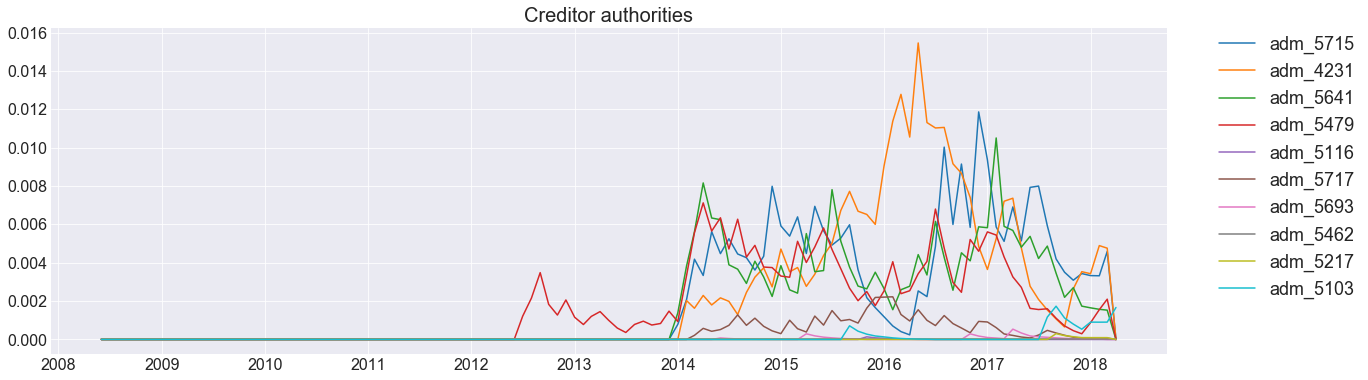

In [12]:
prettify_plot(lambda ax: administrator_hubs_df.loc[top_administrators[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6), fontsize=16))